<!-- dom:TITLE: Solution to exercises, cable equation -->
# Solution to exercises, cable equation
<!-- dom:AUTHOR: Joakim Sundnes -->
<!-- Author: -->  
**Joakim Sundnes**

Date: **Jun 22, 2022**

## Bistable equation

We want to solve the bistable equation on an interval $\Omega =[0,L]$:

$$
\begin{alignat*}{2}
v_t &= kv_{xx} + Av(1-v)(v-\alpha) & \mbox{ for } & t> 0, 0 < x < L, \\
v_x &= 0 & \mbox{ for } &x = 0, x = L, \\
v & = v_0 &\mbox{ for } &t = 0, 0 < x = < L/10, \\
v & = 0 &\mbox{ for } &t = 0, L/10< x = < L,
\end{alignat*}
$$

with

$$
\begin{alignat*}{2}
k &= 1.0, A &= 1.0, \alpha &= 0.1 \\
L &= 100, v0&= 0.3. &
\end{alignat*}
$$

(Note that we have used the compact notation $v_t = \partial
v/\partial t, v_{xx} = \partial^2v/\partial x^2$.)

## Explicit update scheme for $v$

$$
\begin{align*}
v_0^{j+1} &= v_0^j +\frac{k \Delta t}{\Delta x^2} 2 (v_1^j-v_0^j)
+\Delta t f(v_0^j) \\
v_i^{j+1}  &= v_0^j +\frac{k \Delta t}{\Delta x^2} (v_{i-1}^j-2v_i^j+v_{i+1}^j)
+\Delta t f(v_0^j), i = 1, \cdots, N-1 \\
v_N^{j+1} &= v_N^j +\frac{k \Delta t}{\Delta x^2} 2 (v_{N-1}^j-v_N^j)
+\Delta t f(v_N^j)
\end{align*}
$$

## Bistable equation in Python
Use a Numpy array for the solution, and a loop over time steps

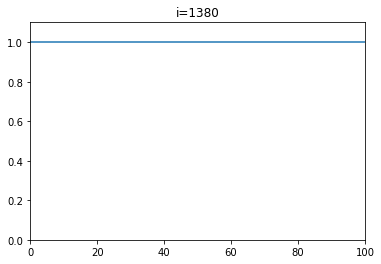

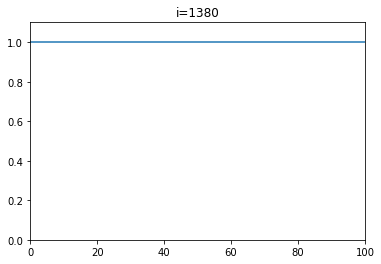

In [6]:
%matplotlib inline

%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
import numpy as np

k = 2.0
A = 1.0
alpha = 0.1
L = 100

dx = 1;
dt = 0.1;
N = int(L/dx)

v = np.zeros(N+1)
v_prev = v
left =  int(N/10)
v_prev[:left] = 0.3

for i in range (1400):
    for j in range(1,N):
        I_ion = A*v_prev[j]*(1-v_prev[j])*(v_prev[j]-alpha)
        v[j]  = v_prev[j] + dt*(k/dx**2)*(v_prev[j+1]-2*v_prev[j]+v_prev[j-1]) +dt*I_ion
    v[0] = v[1]
    v[N] = v[N-1]
    v_prev = v
    if i%20==0:  #to avoid displaying every time step
        plt.clf()
        plt.axis([0, L, 0, 1.1])
        plt.plot(v)
        plt.title('i=%d' % i)
        display.clear_output(wait=True)
        display.display(plt.gcf())

## Comments on the code
* The solution is not saved, but overwritten for every step.

* Loops in Python are slow. Can you update $v$ without looping over the spatial domain?

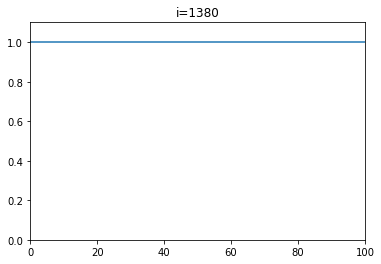

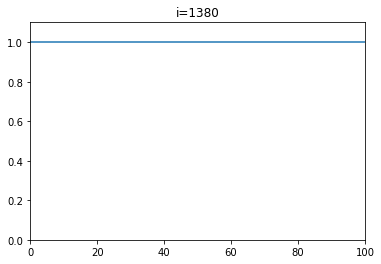

In [8]:
k = 2.0
A = 1.0
alpha = 0.1
L = 100

dx = 1;
dt = 0.1;

N = int(L/dx)

v = np.zeros(N+1)
left =  int(N/10)
v[:left] = 0.3

#introduce the appropriate arrays for slicing:
I = np.arange(1,N)
Ip = I+1
Im = I-1

for i in range (1400):
    I_ion = A*v*(1-v)*(v-alpha)
    v[I] = v[I] + dt*(k/dx**2)*(v[Ip]-2*v[I] +v[Im])
    v = v + dt*I_ion;
    v[0] = v[1]
    v[N] = v[N-1]

    if i%20==0:  #to avoid displaying every time step
        plt.clf()
        plt.axis([0, L, 0, 1.1])
        plt.plot(v)
        plt.title('i=%d' % i)
        display.clear_output(wait=True)
        display.display(plt.gcf())

## Solving the FitzHugh-Nagumo (FHN) model
A small modification of the bistable equation gives the
FHN model:

$$
\begin{alignat*}{2}
v_t &= kv_{xx} + Av(1-v)(v-\alpha) -w & \mbox{ for } & t> 0, 0 < x < L, \\
w_t &= \epsilon (v-\gamma w) & \mbox{ for } & t> 0, 0 < x < L, \\
v_x &= 0 & \mbox{ for } &x = 0, x = L, \\
v & = v_0 &\mbox{ for } &t = 0, 0 < x = < L/10, \\
v & = 0 &\mbox{ for } &t = 0, L/10< x = < L,
\end{alignat*}
$$

The additional parameters are set to

$$
\epsilon = 0.005, \gamma = 2.0 .
$$

Extend the solver from above to solve the FHN model.

## FHN in Python
Update the solver from above to solve the FHN model

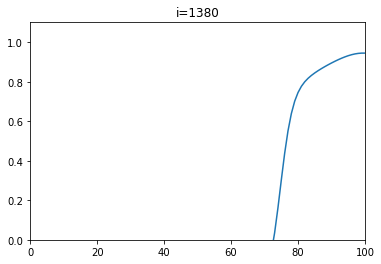

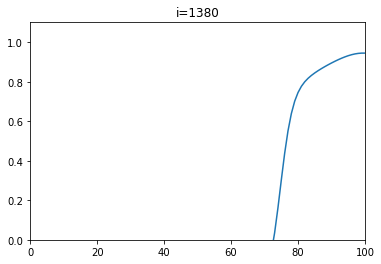

In [9]:
k = 2.0
A = 1.0
alpha = 0.1
L =100
eps = 0.005
gamma = 2.0

v = np.zeros(N+1)
w = np.zeros(N+1)
left = int(N/10)
v[:left] = 0.3
I = np.arange(1,N)
Ip = I+1
Im = I-1

for i in range (1400):
    I_ion = A*v*(1-v)*(v-alpha) -w
    v[I] = v[I] + dt*(k/dx**2)*(v[Ip]-2*v[I] +v[Im])
    v = v + dt*I_ion;
    w = w + dt*eps*(v-gamma*w)

    v[0] = v[1]
    v[N] = v[N-1]

    if i%20==0:  #to avoid displaying every time step
        plt.clf()
        plt.axis([0, L, 0, 1.1])
        plt.plot(v)
        plt.title('i=%d' % i)
        display.clear_output(wait=True)
        display.display(plt.gcf())

## Simulating reentry (1)

We can model a simple reentrant circuit with periodic boundary
conditions:

$$
v(0) = v(L)
$$

* Implement this condition in the FHN solver

* What happens? Why?

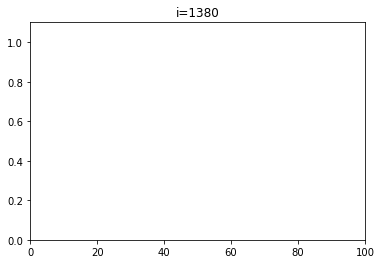

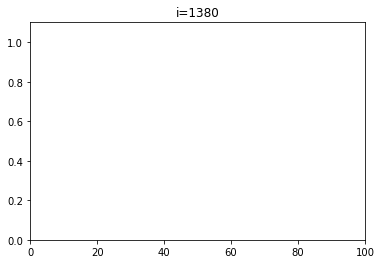

In [10]:
k = 2.0
A = 1.0
alpha = 0.1
L =100
eps = 0.005
gamma = 2.0

v = np.zeros(N+1)
w = np.zeros(N+1)
left = int(N/10)
v[:left] = 0.3
#mid =  int(N/2);
#v[mid-10:mid+10] = 0.3;
#w[:int(0.9*mid)] = 0.1

I = np.arange(N+1)
Ip = I+1
Ip[N] = 0
Im = I-1;
Im[0] = N

for i in range (1400):
    I_ion = A*v*(1-v)*(v-alpha) -w
    v[I] = v[I] + dt*(k/dx**2)*(v[Ip]-2*v[I] +v[Im])
    v = v + dt*I_ion;
    w = w + dt*eps*(v-gamma*w)

    #v[0] = v[1]
    #v[N-1] = v[N-2]

    if i%20==0:  #to avoid displaying every time step
        plt.clf()
        plt.axis([0, L, 0, 1.1])
        plt.plot(v)
        plt.title('i=%d' % i)
        display.clear_output(wait=True)
        display.display(plt.gcf())

## Simulating reentry (2)
Modify the initial condition to:

In [5]:
mid = int(N/2)
V[mid-2:mid+2] = 0.3

NameError: name 'V' is not defined

What happens?

Now, add the line

In [ ]:
W[:int(0.9*mid)] = 1

What happens? Why?